In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns',200)
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding="latin-1",index_col = "rank")

In [3]:
df.shape

(995, 27)

In [4]:
df.head(5)

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.columns

Index(['Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.describe()

,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [7]:
df=df[['Youtuber', 'subscribers', 
#     'video views', 
    'category',
#     'Title',
#        'uploads', 'Country', 'Abbreviation', 
       'channel_type',
#        'video_views_rank', 'country_rank', 'channel_type_rank',
#        'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
#        'highest_monthly_earnings', 'lowest_yearly_earnings',
#        'highest_yearly_earnings', 'subscribers_for_last_30_days',
#        'created_year', 'created_month', 'created_date',
#        'Gross tertiary education enrollment (%)', 'Population',
#        'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'
   ]].copy()

In [8]:
df[ 'subscribers']=pd.to_numeric(df[ 'subscribers'])

In [9]:
df=df.rename(columns={'subscribers':'Subscribers',
                     'category':'Category',
                     'channel_type':'Channel_Type'})

In [10]:
df = df.dropna()
print(df.shape)
df.isna().sum()

(922, 4)


Youtuber        0
Subscribers     0
Category        0
Channel_Type    0
dtype: int64

In [11]:
df.loc[df.duplicated()]

,Youtuber,Subscribers,Category,Channel_Type
rank,,,,


In [12]:
df=df.loc[~df.duplicated(subset=['Youtuber'])].reset_index(drop=True).copy()

In [13]:
df['Category']

0                 Music
1      Film & Animation
2         Entertainment
3             Education
4                 Shows
             ...       
917               Music
918              Sports
919      People & Blogs
920              Gaming
921              Comedy
Name: Category, Length: 922, dtype: object

In [14]:
fig2 = px.sunburst(df, path=['Category'], color_discrete_sequence=px.colors.qualitative.Set3)
fig2.update_layout(title_text='Distribution of YouTube Channel Types', height=500)
fig2.show()

In [15]:
Entertainment=df.query('Category=="Entertainment"').head(10)

Music=df.query('Category=="Music"').head(10)

People=df.query('Category=="People & Blogs"').head(10)

Games=df.query('Category=="Gaming"').head(10)

Comedy=df.query('Category=="Comedy"').head(10)

Education=df.query('Category=="Education"').head(10)

Film_Animation=df.query('Category=="Film & Animation"').head(10)

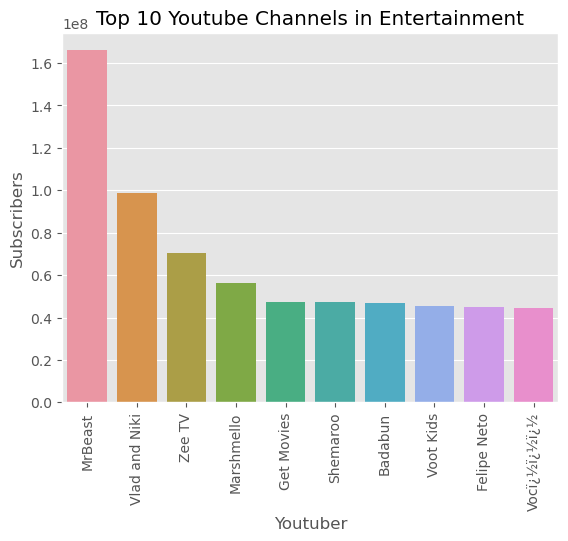

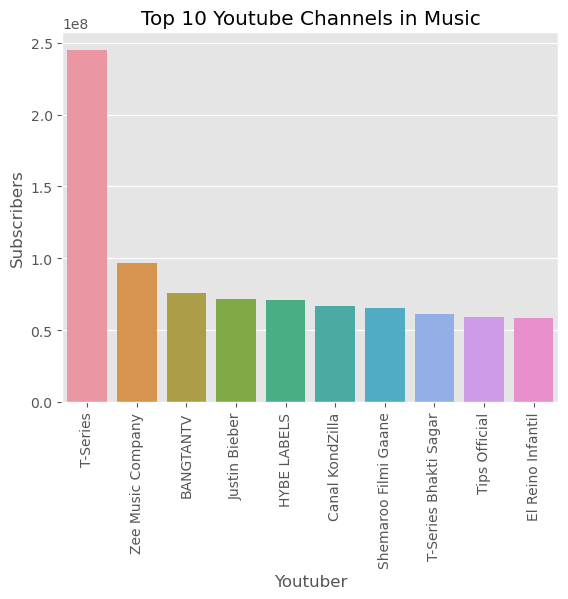

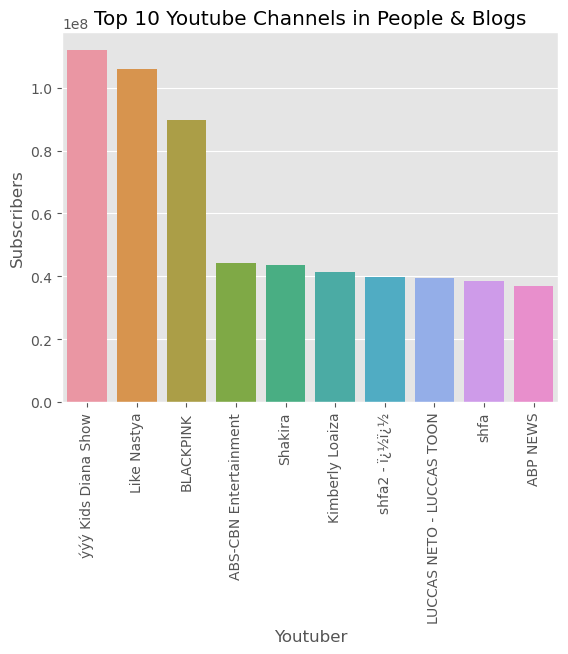

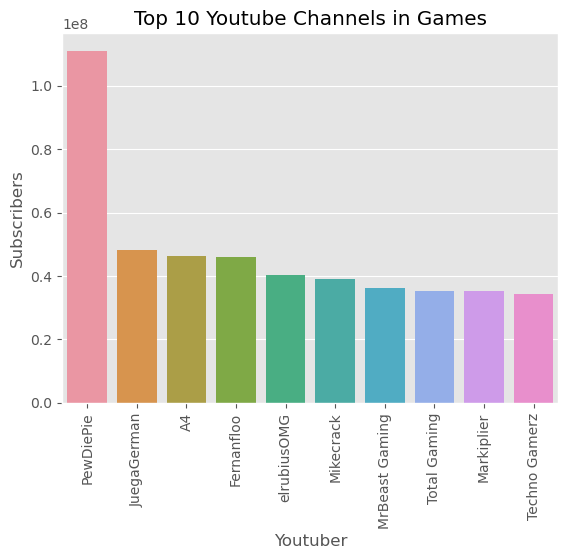

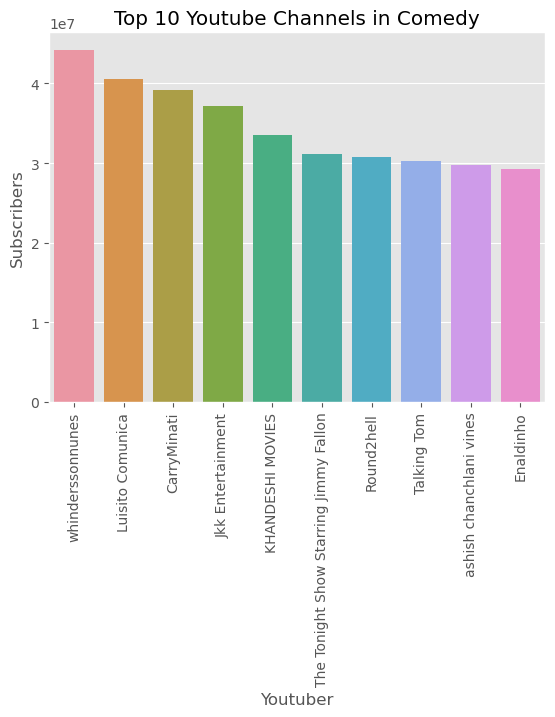

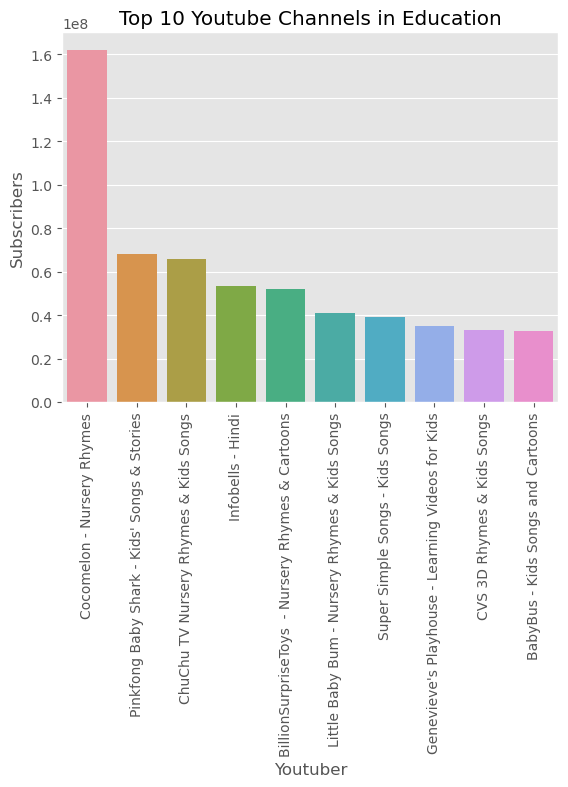

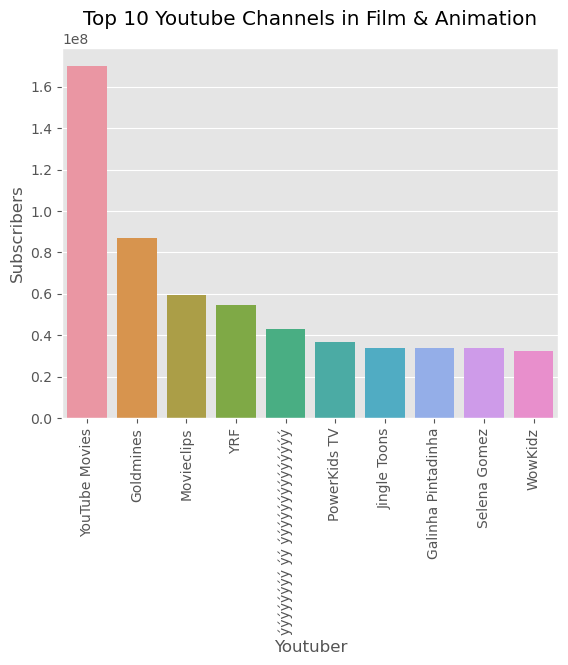

In [16]:


sns.barplot(x='Youtuber', y='Subscribers', data=Entertainment).set(title="Top 10 Youtube Channels in Entertainment")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers',data=Music).set(title="Top 10 Youtube Channels in Music")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers', data=People).set(title="Top 10 Youtube Channels in People & Blogs")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers', data=Games).set(title="Top 10 Youtube Channels in Games")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers', data=Comedy).set(title="Top 10 Youtube Channels in Comedy")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers', data=Education).set(title="Top 10 Youtube Channels in Education")
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Youtuber', y='Subscribers', data=Film_Animation).set(title="Top 10 Youtube Channels in Film & Animation")
plt.xticks(rotation=90)
plt.show()

In [17]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

In [18]:
Entertainment=df.query('Category=="Entertainment"').head(10)

Music=df.query('Category=="Music"').head(10)

People=df.query('Category=="People & Blogs"').head(10)

Games=df.query('Category=="Gaming"').head(10)

Comedy=df.query('Category=="Comedy"').head(10)

Education=df.query('Category=="Education"').head(10)

Film_Animation=df.query('Category=="Film & Animation"').head(10)

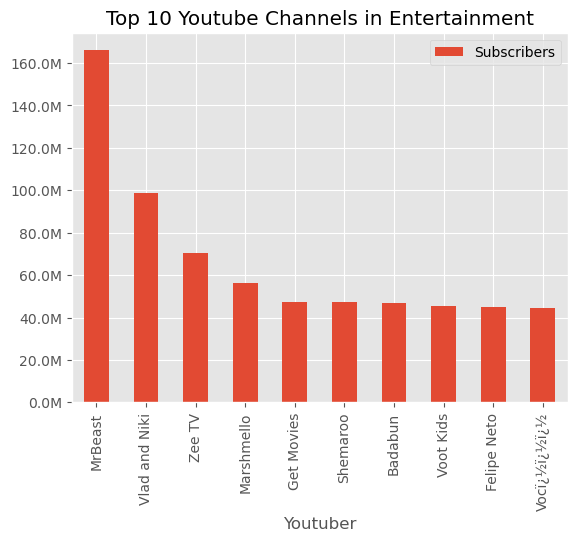

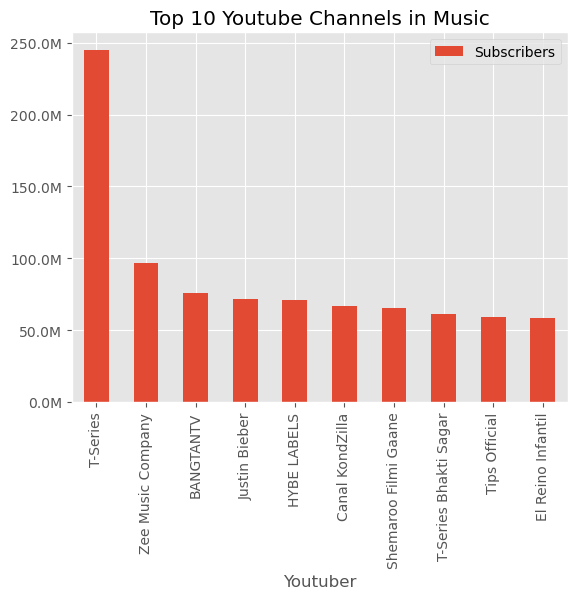

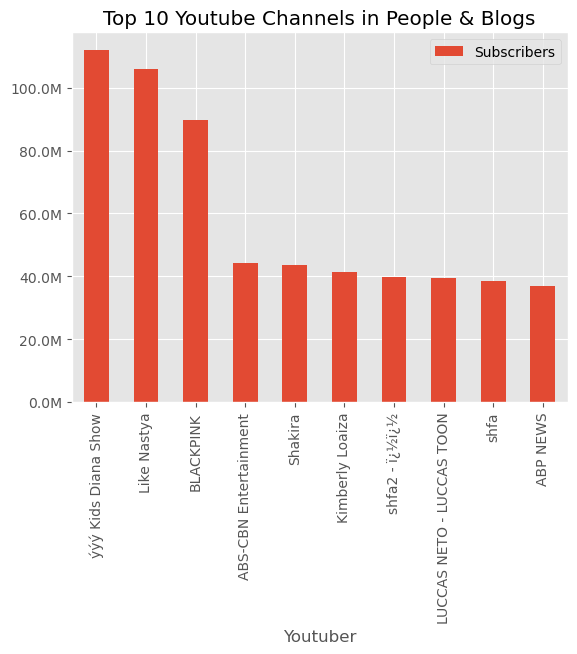

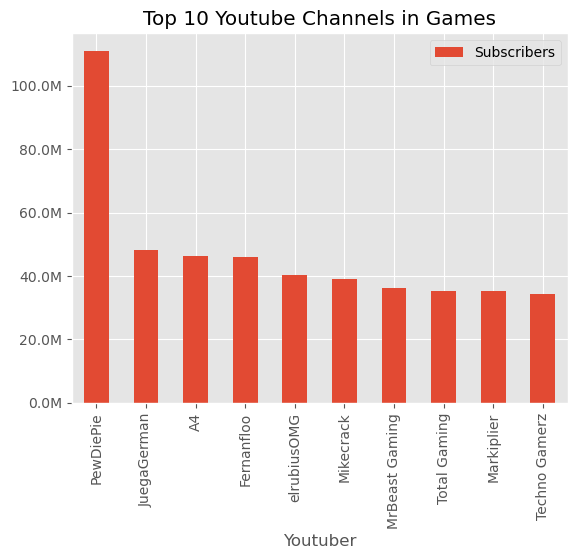

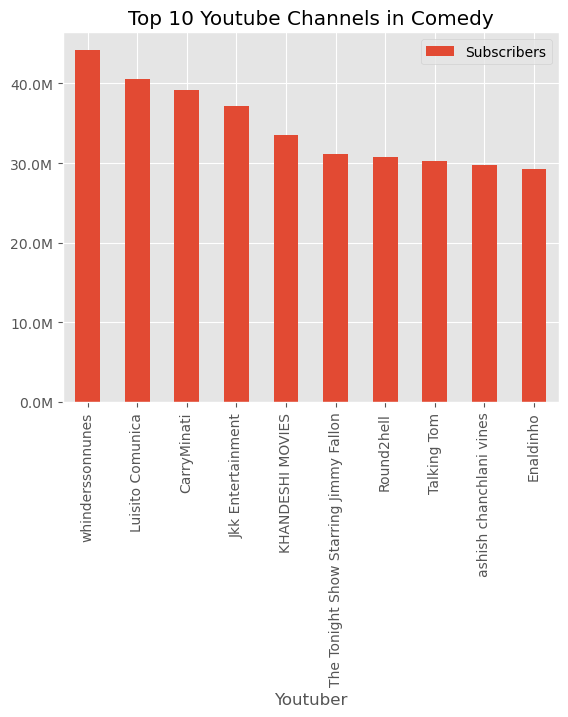

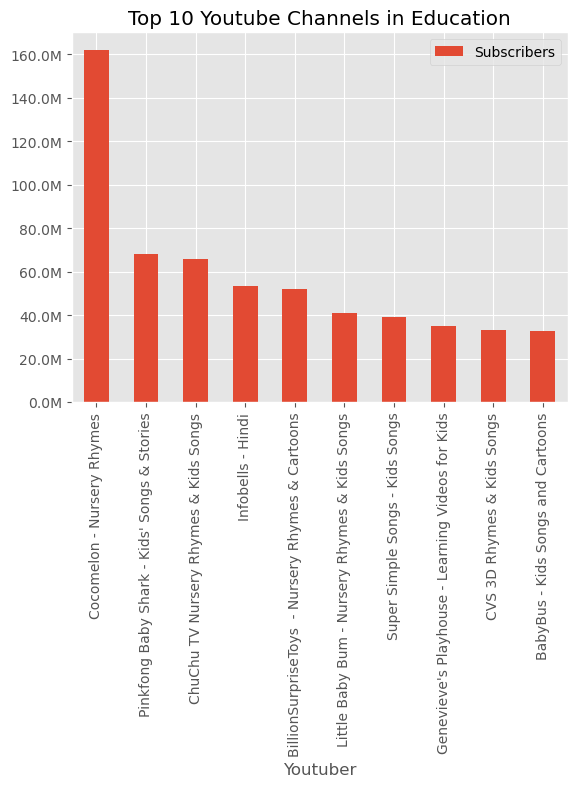

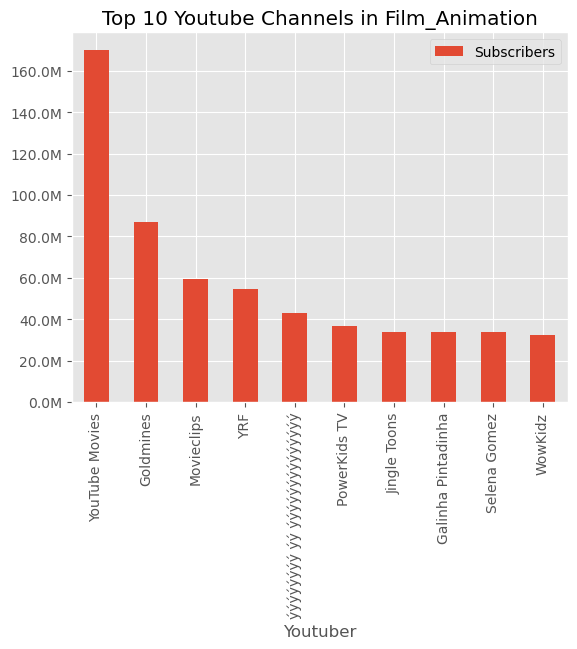

In [19]:
ax=Entertainment.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Entertainment",)
ax.yaxis.set_major_formatter(formatter)

ax=Music.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Music",)
ax.yaxis.set_major_formatter(formatter)

ax=People.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in People & Blogs",)
ax.yaxis.set_major_formatter(formatter)

ax=Games.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Games",)
ax.yaxis.set_major_formatter(formatter)

ax=Comedy.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Comedy",)
ax.yaxis.set_major_formatter(formatter)

ax=Education.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Education",)
ax.yaxis.set_major_formatter(formatter)

ax=Film_Animation.plot(kind='bar',x='Youtuber',y='Subscribers',title="Top 10 Youtube Channels in Film_Animation",)
ax.yaxis.set_major_formatter(formatter)